In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from skimage.color import rgb2hed, hed2rgb

In [3]:
imDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/images/"

imgs = {}

keys = ['ND', 'HFD8', 'HFD14'] 

for key in keys:
    imPath = f"{imDir}{key}.npy"
    img = np.load(imPath)
    print(key, img.shape)
    imgs[key] = img

print('done')

ND (2000, 1681, 3)
HFD8 (2000, 1692, 3)
HFD14 (2000, 1628, 3)
done


(2000, 1628, 3)


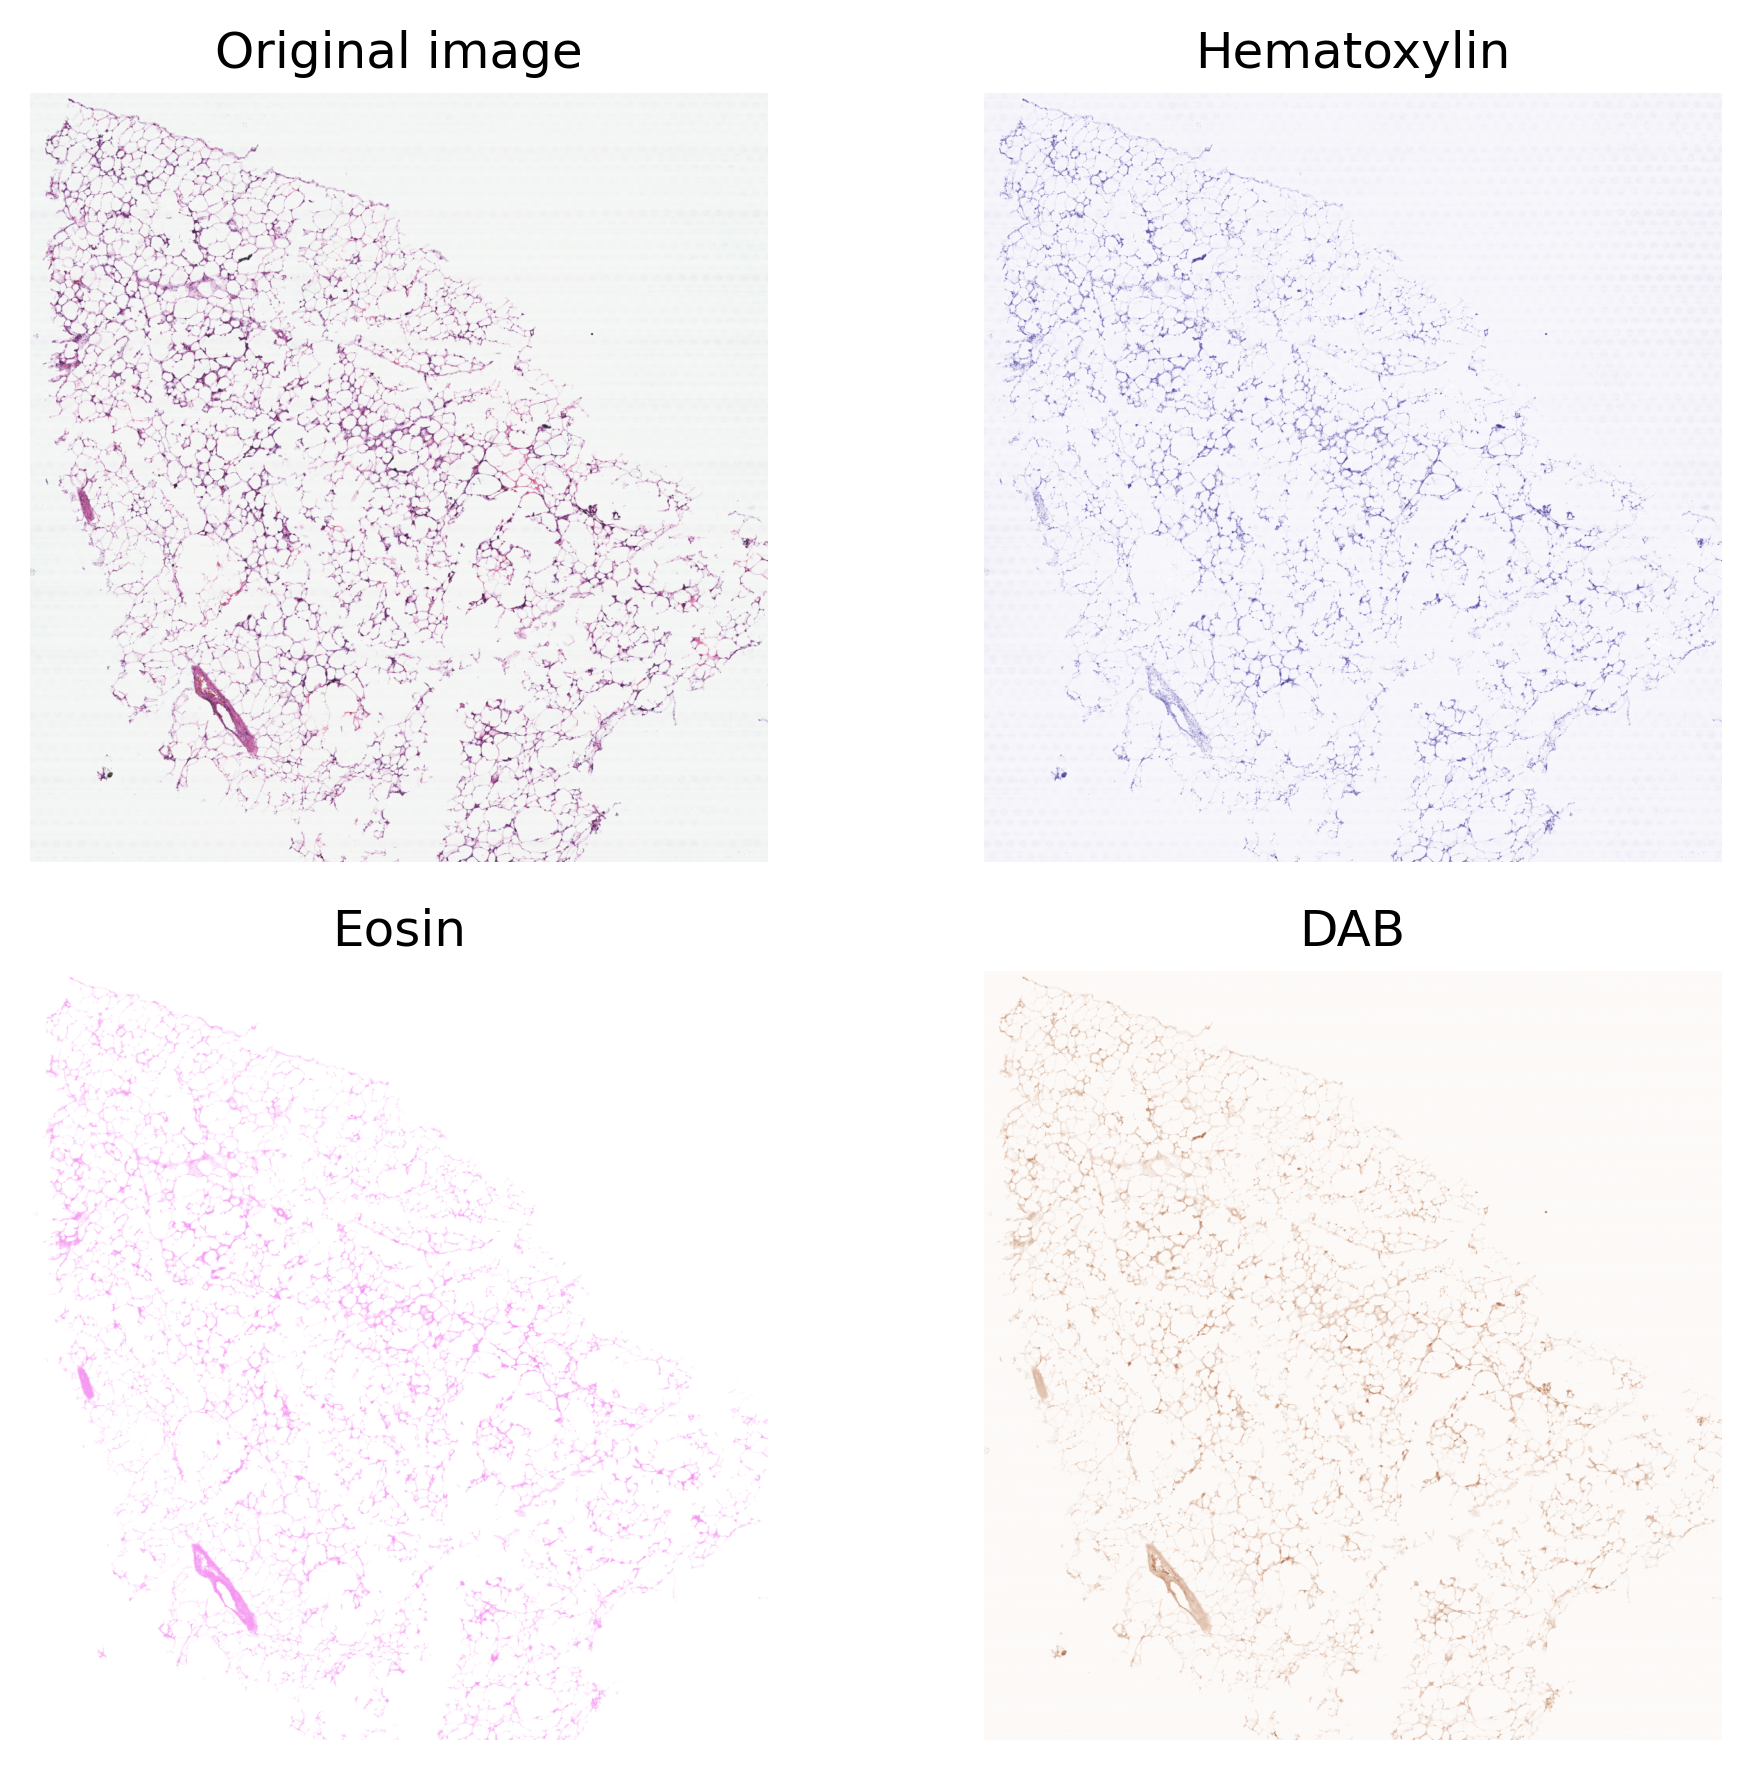

In [24]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 20, 20
plt.rcParams['figure.facecolor'] = "w"
trim = {
    'ND' : {'xlim' :  [220, 1500], 'ylim' : [1600, 630]},
    'HFD8' : {'xlim' :  [190, 1350], 'ylim' : [1680, 400]},
    'HFD14' : {'xlim' :  [250, 1400], 'ylim' : [1650, 450]},
    
}

    
keys = ['HFD14'] 

for key in keys:
    img = imgs[key]
    print(img.shape)
    
    # Separate the stains from the IHC image
    ihc_hed = rgb2hed(img)

    # Create an RGB image for each of the stains
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
    ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

    # Display
    fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
    ax = axes.ravel()
    
    xlim = trim[key]['xlim']
    ylim = trim[key]['ylim']

    ax[0].imshow(img)
    ax[0].set_title("Original image")
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)

    ax[1].imshow(ihc_h)
    ax[1].set_title("Hematoxylin")
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)

    ax[2].imshow(ihc_e)
    ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image
    ax[2].set_xlim(xlim)
    ax[2].set_ylim(ylim)
    
    ax[3].imshow(ihc_d)
    ax[3].set_title("DAB")
    ax[3].set_xlim(xlim)
    ax[3].set_ylim(ylim)

    for a in ax.ravel():
        a.axis('off')

    fig.tight_layout()
    
    break